In [2]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt

In [33]:
data = pd.read_csv("personenmobiliteit incl. namen.csv", delimiter=',', index_col='ID')

In [34]:
data = data[['Populatie', 'Vervoerwijzen', 'KenmerkenVerplaatsing', 'RegioS', 'Perioden', 'Afstand_2']]
population_total = data[data['Populatie'].isin([10000])] # filter data on total population (uitsluiten van alleen populatie 12 jaar of ouder)
car_and_train = population_total[population_total['Vervoerwijzen'].isin(['Auto (passagier)', 'Auto (bestuurder)', 'Trein'])] # filter data on cars

## Kilometers per year

In [35]:
car_and_train_total = car_and_train[car_and_train['KenmerkenVerplaatsing'].isin(['Totaal'])]
total_Nederland = car_and_train_total[car_and_train_total['RegioS'] == 'Nederland']

C:\Users\brigi\AppData\Local\Temp\ipykernel_11616\4109390152.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_Nederland['Datum'] = (
C:\Users\brigi\AppData\Local\Temp\ipykernel_11616\4109390152.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_Nederland['Datum'] = pd.to_datetime(total_Nederland['Datum'])


,Auto (bestuurder),Auto (passagier),Auto (totaal),Trein
Datum,,,,
2010-01-01,15.33,7.32,22.65,2.47
2011-01-01,16.00,6.45,22.45,2.79
2012-01-01,15.28,6.27,21.55,2.68
2013-01-01,15.63,6.78,22.41,2.97
2014-01-01,15.57,6.70,22.27,2.75
2015-01-01,15.30,6.11,21.41,2.66
2016-01-01,15.14,6.21,21.35,2.80
2017-01-01,14.91,6.08,20.99,3.00


<Axes: xlabel='Datum'>

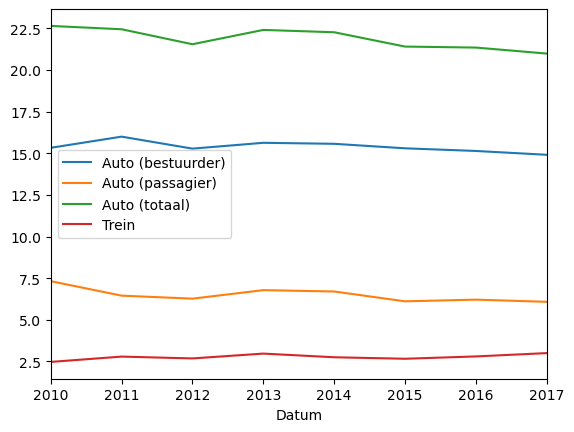

In [32]:
total_Nederland.loc[:, 'Dag'] = 1
total_Nederland.loc[:, 'Maand'] = 1

total_Nederland['Datum'] = (
    total_Nederland['Perioden'].astype(str) + '-' +
    total_Nederland['Maand'].astype(str).str.zfill(2) + '-' +
    total_Nederland['Dag'].astype(str).str.zfill(2)
)
total_Nederland['Datum'] = pd.to_datetime(total_Nederland['Datum'])
total_Nederland.set_index('Datum', inplace=True)

auto_bestuurder_NL = total_Nederland[total_Nederland['Vervoerwijzen'] == 'Auto (bestuurder)']
auto_passagier_NL = total_Nederland[total_Nederland['Vervoerwijzen'] == 'Auto (passagier)']
trein_NL = total_Nederland[total_Nederland['Vervoerwijzen'] == 'Trein']

nederland_per_year = auto_bestuurder_NL[['Afstand_2']].copy()
nederland_per_year.rename(columns={'Afstand_2': 'Auto (bestuurder)'}, inplace=True)
nederland_per_year['Auto (passagier)'] = auto_passagier_NL[['Afstand_2']]
nederland_per_year['Auto (totaal)'] = nederland_per_year['Auto (bestuurder)'] + nederland_per_year['Auto (passagier)']
nederland_per_year['Trein'] = trein_NL[['Afstand_2']]

display(nederland_per_year)
nederland_per_year.plot()

## Kilometers per month

In [36]:
car_and_train_per_month = car_and_train[car_and_train['KenmerkenVerplaatsing'].isin(['Verplaatsing in januari', 
                                                       'Verplaatsing in februari', 
                                                       'Verplaatsing in maart', 
                                                       'Verplaatsing in april', 
                                                       'Verplaatsing in mei', 
                                                       'Verplaatsing in juni',
                                                       'Verplaatsing in juli',
                                                       'Verplaatsing in augustus',
                                                       'Verplaatsing in september',
                                                       'Verplaatsing in oktober',
                                                       'Verplaatsing in november',
                                                       'Verplaatsing in december'])]
                              

In [39]:
kenmerken_months = ['Verplaatsing in januari', 
                    'Verplaatsing in februari',
                    'Verplaatsing in maart',
                    'Verplaatsing in april',
                    'Verplaatsing in mei',
                    'Verplaatsing in juni',
                    'Verplaatsing in juli',
                    'Verplaatsing in augustus',
                    'Verplaatsing in september',
                    'Verplaatsing in oktober',
                    'Verplaatsing in november',
                    'Verplaatsing in december',]
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

replace_dict = dict(zip(kenmerken_months, months))
car_and_train_per_month['KenmerkenVerplaatsing'] = car_and_train_per_month['KenmerkenVerplaatsing'].replace(replace_dict)
car_and_train_per_month.loc[:, 'Dag'] = 1

car_and_train_per_month['Datum'] = (
    car_and_train_per_month['Perioden'].astype(str) + '-' +
    car_and_train_per_month['KenmerkenVerplaatsing'].astype(str).str.zfill(2) + '-' +
    car_and_train_per_month['Dag'].astype(str).str.zfill(2)
)
car_and_train_per_month['Datum'] = pd.to_datetime(car_and_train_per_month['Datum'])
car_and_train_per_month.set_index('Datum', inplace=True)

C:\Users\brigi\AppData\Local\Temp\ipykernel_11616\140228646.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_and_train_per_month['KenmerkenVerplaatsing'] = car_and_train_per_month['KenmerkenVerplaatsing'].replace(replace_dict)
C:\Users\brigi\AppData\Local\Temp\ipykernel_11616\140228646.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_and_train_per_month['Datum'] = (
C:\Users\brigi\AppData\Local\Temp\ipykernel_11616\140228646.py:24: SettingWithCopyWarning: 
A value is trying to be set on a co

C:\Users\brigi\AppData\Local\Temp\ipykernel_11616\642597713.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_bestuurder.sort_index(inplace=True)
C:\Users\brigi\AppData\Local\Temp\ipykernel_11616\642597713.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_passagier.sort_index(inplace=True)
C:\Users\brigi\AppData\Local\Temp\ipykernel_11616\642597713.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trein.sort_index(inplace

,Auto (bestuurder),Auto (passagier),Auto (totaal),Trein
Datum,,,,
2010-01-01,15.96,7.17,23.13,1.94
2010-02-01,15.45,6.06,21.51,2.94
2010-03-01,16.12,7.08,23.20,2.36
2010-04-01,16.09,7.37,23.46,2.55
2010-05-01,13.28,8.63,21.91,2.26
...,...,...,...,...
2017-08-01,14.80,5.78,20.58,2.09
2017-09-01,14.57,6.38,20.95,3.39
2017-10-01,15.39,6.19,21.58,3.54


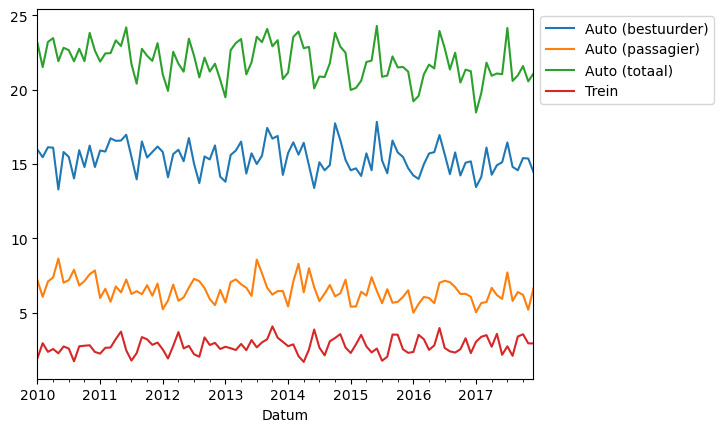

In [53]:
car_and_train_nl = car_and_train_per_month[car_and_train_per_month['RegioS'] == 'Nederland']

car_bestuurder = car_and_train_nl[car_and_train_nl['Vervoerwijzen'] == 'Auto (bestuurder)']
car_passagier = car_and_train_nl[car_and_train_nl['Vervoerwijzen'] == 'Auto (passagier)']
trein = car_and_train_nl[car_and_train_nl['Vervoerwijzen'] == 'Trein']

car_bestuurder.sort_index(inplace=True)
car_passagier.sort_index(inplace=True)
trein.sort_index(inplace=True)

data_Nederland = car_bestuurder[['Afstand_2']].copy()
data_Nederland.rename(columns={'Afstand_2': 'Auto (bestuurder)'}, inplace=True)
data_Nederland['Auto (passagier)'] = car_passagier[['Afstand_2']]
data_Nederland['Auto (totaal)'] = data_Nederland['Auto (bestuurder)'] + data_Nederland['Auto (passagier)']
data_Nederland['Trein'] = trein[['Afstand_2']]
display(data_Nederland)

data_Nederland.plot()

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))